In [1]:
import os
import anndata
import pandas as pd 
import numpy as np

from dredFISH.Utils.__init__plots import *

# import matplotlib.pyplot as plt
# import seaborn as sns

# genes and probes

In [2]:
f = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test14_denovo/data/mm10.refGene.gtf"
df_a = pd.read_csv(f, sep="\t", header=None) #, nrows=10)
df_a = df_a[df_a[2]=='exon']
df_a['gene'] = df_a[8].apply(lambda x: x.split(" ")[1][1:-2])
df_a['len'] = df_a[4]-df_a[3]
print(df_a.shape)
df_a

(427386, 11)


,0,1,2,3,4,5,6,7,8,gene,len
1,chr12,refGene,exon,98746968,98747158,.,+,.,"gene_id ""Zc3h14""; transcript_id ""NM_001160107""...",Zc3h14,190
4,chr12,refGene,exon,98747480,98747522,.,+,.,"gene_id ""Zc3h14""; transcript_id ""NM_001160107""...",Zc3h14,42
6,chr12,refGene,exon,98752778,98752892,.,+,.,"gene_id ""Zc3h14""; transcript_id ""NM_001160107""...",Zc3h14,114
8,chr12,refGene,exon,98756185,98756225,.,+,.,"gene_id ""Zc3h14""; transcript_id ""NM_001160107""...",Zc3h14,40
10,chr12,refGene,exon,98757009,98757204,.,+,.,"gene_id ""Zc3h14""; transcript_id ""NM_001160107""...",Zc3h14,195
...,...,...,...,...,...,...,...,...,...,...,...
1014760,chr19,refGene,exon,24132606,24132708,.,-,.,"gene_id ""Tjp2""; transcript_id ""NM_001376368""; ...",Tjp2,102
1014762,chr19,refGene,exon,24134850,24134974,.,-,.,"gene_id ""Tjp2""; transcript_id ""NM_001376368""; ...",Tjp2,124
1014764,chr19,refGene,exon,24138779,24138832,.,-,.,"gene_id ""Tjp2""; transcript_id ""NM_001376368""; ...",Tjp2,53
1014767,chr19,refGene,exon,24193709,24193829,.,-,.,"gene_id ""Tjp2""; transcript_id ""NM_001376368""; ...",Tjp2,120


In [3]:
tmp = df_a.groupby(['gene', 0,3,4]).first().reset_index()
exon_lens = tmp.groupby('gene').sum()['len']
exon_lens

/tmp/ipykernel_21395/307673722.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exon_lens = tmp.groupby('gene').sum()['len']


gene
0610005C13Rik     1117
0610009B22Rik      793
0610009E02Rik     1968
0610009L18Rik      617
0610010F05Rik     4995
                 ...  
Zyx               4491
Zzef1            11095
Zzz3              7892
a                  688
ccdc198           1160
Name: len, Length: 25239, dtype: int64

In [4]:
f = "/bigstore/GeneralStorage/fangming/projects/amygdala/Honglab_Amygdala_genes_organized_Nov15_2022.csv"
df = pd.read_csv(f, index_col=0)
genes = df['Gene_name_std'].values
print(df.shape, df['priority_binary'].sum())
df

(235, 5) 25


,Gene_name_std,Gene name,Source,priority,priority_binary
0,Adra2a,Adra2aAdra2a,"Chen 2019, Cell; MeA, neuronal subtype markers...",YesNo,1
1,Brs3,Brs3,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1
2,Cckar,Cckar,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1
3,Cckbr,Cckbr,"Chen 2019, Cell; MeA, neuronal subtype markers...",Yes,1
4,Chodl,Chodl,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1
...,...,...,...,...,...
230,Zbtb20,ZBTB20,"Herrero 2020, Molecular Autism; human ASD risk...",No,0
231,Zeb2,Zeb2,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0
232,Zfhx4,Zfhx4,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0
233,Zic4,Zic4,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0


In [5]:
np.unique(genes).shape, genes.shape

((235,), (235,))

In [6]:
f = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_seq/mm10_tm37-47_tp37_30bp_Oct28.csv'
dfnum = pd.read_csv(f)
dfnum

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214541,3214570,AGAAAGCGGGAATGTTTACTTGCTGTGTGG,39.76,100.0,0.0,0,0.310,0,+,Xkr4,1,30,0.466667
1,chr1,3214625,3214654,ACAAATCTTAGCTGATGGAGTGGTAAGCCC,38.59,100.0,0.0,0,0.276,0,+,Xkr4,1,30,0.466667
2,chr1,3214679,3214708,AATGGCATACACATTGCATCTGTATGCTCT,37.39,100.0,0.0,0,0.177,3,+,Xkr4,1,30,0.400000
3,chr1,3214721,3214750,TGTGTCCCAAAGTCTCTAGTAGACACATCA,37.01,100.0,0.0,0,0.234,2,+,Xkr4,1,30,0.433333
4,chr1,3214751,3214780,TTTTGACCTTGGATGGGAAGAGGGTAAGTC,38.33,100.0,0.0,0,0.381,2,+,Xkr4,1,30,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098716,chrY,2663507,2663536,TTTTCGGCTTCTGTAAGGCTTTTCCACCTG,39.57,100.0,0.0,0,0.302,2,+,Sry,1,30,0.466667
1098717,chrY,2663537,2663566,CATCCCAGCTGCTTGCTGATCTCTGTATTT,39.00,100.0,0.0,0,0.198,10,+,Sry,1,30,0.466667
1098718,chrY,2663567,2663596,TGCATGCTGGGATTCTGCTGGGCCAACTTG,44.74,100.0,0.0,0,0.339,0,+,Sry,1,30,0.566667
1098719,chrY,2663597,2663626,TGCCTCTCACCACGGGACCACACCATAAAT,43.00,100.0,0.0,0,0.333,0,+,Sry,1,30,0.533333


In [7]:
dfnum.describe()

,start,end,tm,onscore,offscore,repeat,prob,maxkmer,transcripts,len,gc
count,1.098721e+06,1.098721e+06,1.098721e+06,1.098721e+06,1.098721e+06,1098721.0,1.098721e+06,1.098721e+06,1.098721e+06,1098721.0,1.098721e+06
mean,7.731173e+07,7.731176e+07,4.134712e+01,9.977535e+01,7.907167e-03,0.0,2.504890e-01,1.080831e+00,1.819567e+00,30.0,5.226900e-01
std,4.419780e+07,4.419780e+07,3.298542e+00,5.407218e-01,6.001879e-01,0.0,9.071136e-02,1.292113e+00,1.600295e+00,0.0,7.725592e-02
min,7.253280e+05,7.253570e+05,3.701000e+01,9.700100e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,30.0,3.666667e-01
25%,3.848940e+07,3.848942e+07,3.805000e+01,1.000000e+02,0.000000e+00,0.0,1.880000e-01,0.000000e+00,1.000000e+00,30.0,4.666667e-01
50%,7.601929e+07,7.601932e+07,4.101000e+01,1.000000e+02,0.000000e+00,0.0,2.470000e-01,0.000000e+00,1.000000e+00,30.0,5.333333e-01
75%,1.107561e+08,1.107561e+08,4.426000e+01,1.000000e+02,0.000000e+00,0.0,3.100000e-01,2.000000e+00,2.000000e+00,30.0,6.000000e-01
max,1.951766e+08,1.951767e+08,4.699000e+01,1.000000e+02,4.999700e+01,0.0,5.000000e-01,1.000000e+01,6.600000e+01,30.0,7.000000e-01


In [8]:
genes_cnst = dfnum.groupby('gname').size()
genes_cnst

gname
0610005C13Rik     20
0610009B22Rik      9
0610009E02Rik      9
0610009L18Rik     11
0610010F05Rik     32
                ... 
Zyx               34
Zzef1            262
Zzz3              74
a                 12
ccdc198           23
Length: 23693, dtype: int64

In [9]:
[gene for gene in genes if gene not in genes_cnst.index.values]

[]

In [10]:
df['num_probes'] = genes_cnst.loc[df['Gene_name_std'].values].values
df

,Gene_name_std,Gene name,Source,priority,priority_binary,num_probes
0,Adra2a,Adra2aAdra2a,"Chen 2019, Cell; MeA, neuronal subtype markers...",YesNo,1,71
1,Brs3,Brs3,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,58
2,Cckar,Cckar,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,65
3,Cckbr,Cckbr,"Chen 2019, Cell; MeA, neuronal subtype markers...",Yes,1,65
4,Chodl,Chodl,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,50
...,...,...,...,...,...,...
230,Zbtb20,ZBTB20,"Herrero 2020, Molecular Autism; human ASD risk...",No,0,66
231,Zeb2,Zeb2,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0,3
232,Zfhx4,Zfhx4,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0,300
233,Zic4,Zic4,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0,76


In [11]:
(df['num_probes'] >= 50).sum()

163

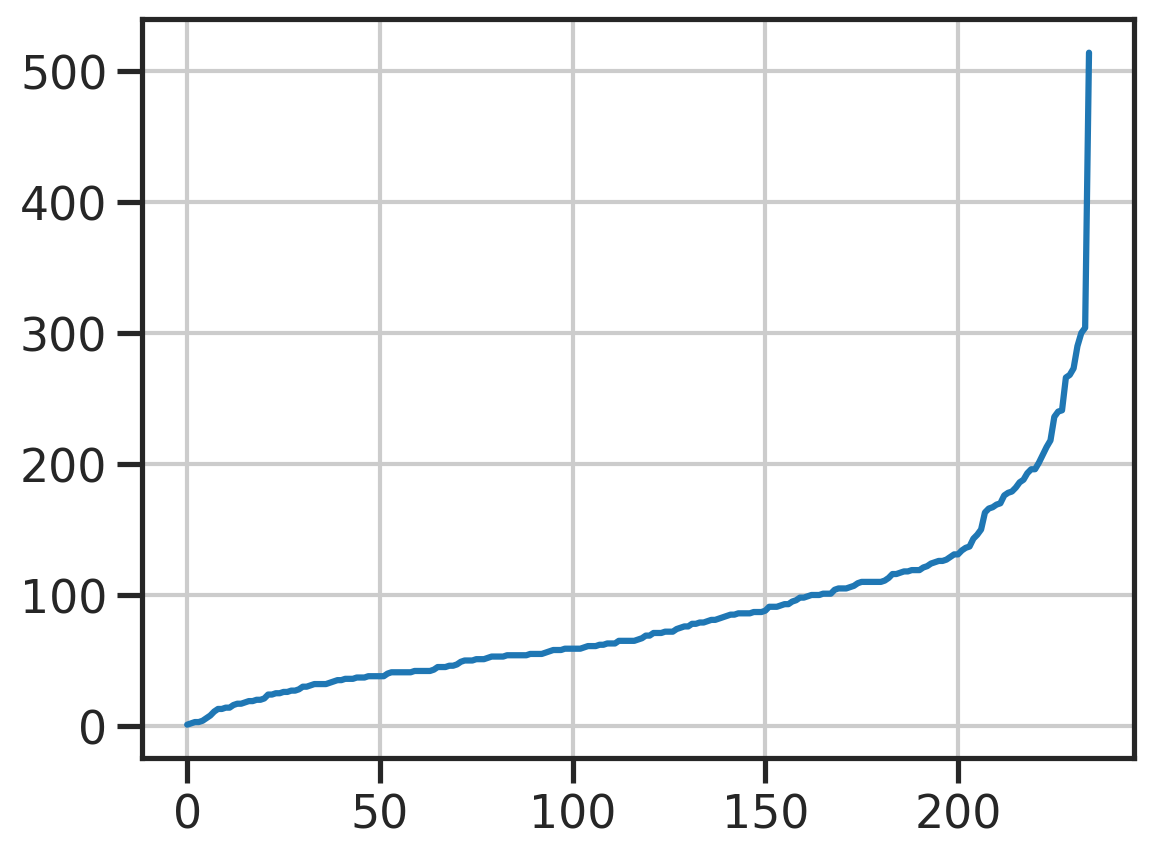

In [12]:
plt.plot(np.sort(df['num_probes'].values))

In [13]:
# fout = "/bigstore/GeneralStorage/fangming/projects/amygdala/Honglab_Amygdala_genes_num_probes_Nov28_2022.csv"
# df.to_csv(fout)

# expression data

In [14]:
ddir = '/bigstore/GeneralStorage/fangming/projects/amygdala/data'

In [15]:
f = os.path.join(ddir, "Chen2019_MeA_Neuron_cluster.csv") 
df1 = pd.read_csv(f)
df1

,dsq.MeA@meta$clust_louvain_merged
0,20
1,24
2,24
3,24
4,22
...,...
10118,4
10119,1
10120,1
10121,1


In [16]:
np.sort(df1.iloc[:,0].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [17]:
%%time
# f = os.path.join(ddir, "Chen2019_MeA_Neuron_DGE_allGenes.csv") 
f = os.path.join(ddir, "Chen2019_MeA_Neuron_DGE_allGenes.h5ad") 
adata = anndata.read(f)
adata

# df2 = pd.read_csv(f, index_col=0)
# df2

# adata = anndata.AnnData(df2)
# fout = os.path.join(ddir, "Chen2019_MeA_Neuron_DGE_allGenes.h5ad") 
# adata.write(fout)
# print(fout)

CPU times: user 30.9 ms, sys: 459 ms, total: 490 ms
Wall time: 489 ms


AnnData object with n_obs × n_vars = 16961 × 10123

In [18]:
df2 = pd.DataFrame(adata.X, index=adata.obs.index, columns=adata.var.index)

genes_rename = {
    'Fam46a': "Tent5a", 
    'Nov'   : "Ccn3",
    'Park2' : "Prkn",
    'Drd1a' : "Drd1",
}

for key, item in genes_rename.items():
     print(key, key in df2.index.values, item in df2.index.values)
        
df2.index = [genes_rename[col] if col in genes_rename.keys() else col 
               for col in df2.index]
df2

Fam46a True False
Nov True False
Park2 True False
Drd1a True False


,E40_GGATAGTCCAGA,E40_TAACGACATTCG,E40_CGTTCGTTCGAC,E40_CTGCAGTATTTT,E40_CCTATGGGGATA,E40_TAGCGATTCTTG,E40_AATGACGTATAG,E40_AGTATCTTTATT,E40_GCTAGAACTTCG,E40_CTGCACGACACA,...,E51_ACGGGCAGGTCA,E51_ATTGACCCTCGA,E51_TGCAATCATTTA,E51_TGAAGCGGGCCA,E51_GGAGTCGCCTAG,E51_AGATCTCACCTG,E51_GCGGTCGCGTTA,E51_GTCTTTGCGAGT,E51_CATGAAGATGCC,E51_CGATCGAGATAA
0610005C13Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007N19Rik,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610007P14Rik,4.0,10.0,3.0,0.0,4.0,4.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009B22Rik,8.0,6.0,7.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009D07Rik,12.0,16.0,7.0,5.0,5.0,7.0,7.0,4.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyg11b,20.0,17.0,10.0,16.0,4.0,3.0,1.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zzef1,5.0,8.0,2.0,3.0,3.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
genes_de = df2.index.values
genes_comm = np.intersect1d(genes, genes_de)
genes.shape, genes_de.shape, genes_comm.shape

((235,), (16961,), (228,))

In [52]:
[gene for gene in genes if gene not in genes_cnst.index.values]

[]

In [54]:
[gene for gene in genes if gene not in genes_comm]

['Cyp26a1', 'Igfn1', 'Lhx8', 'Pah', 'Rspo2', 'Slc23a3', 'Vdr']

# merge

In [20]:
tmp = df2.T.copy()
tmp['clst'] = df1.iloc[:,0].values
tmp

,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,clst
E40_GGATAGTCCAGA,0.0,0.0,4.0,8.0,12.0,0.0,0.0,1.0,12.0,0.0,...,0.0,1.0,130.0,1.0,0.0,20.0,0.0,5.0,2.0,20
E40_TAACGACATTCG,0.0,2.0,10.0,6.0,16.0,0.0,1.0,4.0,4.0,0.0,...,0.0,0.0,88.0,0.0,1.0,17.0,0.0,8.0,3.0,24
E40_CGTTCGTTCGAC,0.0,0.0,3.0,7.0,7.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,113.0,3.0,0.0,10.0,0.0,2.0,0.0,24
E40_CTGCAGTATTTT,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,44.0,0.0,0.0,16.0,0.0,3.0,1.0,24
E40_CCTATGGGGATA,0.0,0.0,4.0,2.0,5.0,0.0,0.0,2.0,5.0,0.0,...,0.0,0.0,59.0,0.0,0.0,4.0,0.0,3.0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E51_AGATCTCACCTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
E51_GCGGTCGCGTTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
E51_GTCTTTGCGAGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
E51_CATGAAGATGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
merged = tmp.groupby('clst').sum()
merged

,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Zufsp,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3
clst,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,357.0,30.0,49.0,6.0,8.0,24.0,54.0,1.0,...,12.0,13.0,6.0,628.0,7.0,7.0,300.0,4.0,97.0,33.0
2,0.0,0.0,325.0,13.0,29.0,1.0,4.0,8.0,42.0,0.0,...,14.0,3.0,4.0,362.0,9.0,5.0,199.0,1.0,47.0,17.0
3,2.0,19.0,73.0,79.0,153.0,12.0,36.0,35.0,24.0,3.0,...,16.0,9.0,1.0,260.0,14.0,12.0,104.0,9.0,41.0,41.0
4,0.0,0.0,20.0,5.0,12.0,0.0,3.0,1.0,1.0,0.0,...,2.0,1.0,0.0,70.0,0.0,0.0,13.0,1.0,6.0,2.0
5,1.0,0.0,195.0,18.0,21.0,4.0,3.0,15.0,42.0,1.0,...,13.0,6.0,5.0,250.0,1.0,3.0,146.0,4.0,84.0,21.0
6,1.0,2.0,471.0,42.0,75.0,19.0,12.0,53.0,100.0,6.0,...,54.0,33.0,24.0,884.0,8.0,25.0,313.0,12.0,194.0,79.0
7,1.0,0.0,81.0,10.0,10.0,5.0,2.0,12.0,34.0,0.0,...,15.0,9.0,12.0,107.0,1.0,4.0,47.0,8.0,76.0,18.0
8,1.0,0.0,91.0,6.0,17.0,1.0,2.0,11.0,32.0,1.0,...,8.0,4.0,1.0,164.0,0.0,6.0,67.0,1.0,49.0,21.0
9,0.0,0.0,47.0,47.0,120.0,3.0,9.0,17.0,45.0,0.0,...,19.0,18.0,5.0,546.0,6.0,6.0,73.0,22.0,32.0,58.0


In [23]:
cov_merged = merged.sum(axis=1)
cpm_merged = merged.divide(cov_merged, axis=0)*1e6

n_merged = np.log10(1+cpm_merged)
z_merged = (n_merged - n_merged.mean(axis=0))/n_merged.std(axis=0)

fpkm_merged = cpm_merged.divide(exon_lens.reindex(cpm_merged.columns)/1000, axis=1)

csub = cpm_merged[genes_comm]
nsub = n_merged[genes_comm]
zsub = z_merged[genes_comm]
fsub = fpkm_merged[genes_comm]
maxlogcpm = nsub.max(axis=0)
maxfpkm = fsub.max(axis=0)
maxcpm = csub.max(axis=0)

assert np.all(~np.isnan(fsub)) #.sum().sum()

nsub.shape, zsub.shape, fsub.shape, maxlogcpm.shape, maxfpkm.shape

((27, 228), (27, 228), (27, 228), (228,), (228,))

In [37]:
num_probes_sub = df.set_index('Gene_name_std').loc[genes_comm]['num_probes'].values
num_probes_sub

array([ 62,  51,  96,  59,  71,  34,  56,  21,  38, 106,   8,  55,  13,
        32,  58,  24,  41, 169,  65,  32,  26,  63,  57,  85,  19,  50,
        53,  65,  65,  41,   4,  54,  87,   2,  63, 266, 104,  32, 268,
        50,  30, 119,  46, 116, 110,  74, 105,  49, 241,  99,  87,   3,
       170,  24,  54,  78, 118,  19,  30,  37,  92, 131, 196,  84, 166,
        82,  98,  86,  53,  42,  65,  62,  55,  25,  60,  38, 121, 176,
        11,  86,  45,  54, 100,  98,  42, 118, 101,  35,  14,  61,  27,
        72, 110,  59,  79,  63,  36, 178,  42,  53, 117,  79,  86, 514,
        18,  69, 111, 179, 236, 100,  41,  55, 126,  28,  45, 134,  51,
       188, 136, 110,  37, 127,  43,  36,  72,  65,  78,  72,  53,  80,
       182,  41,   1,  71, 193, 186, 119,  67,  91,  69,  37, 213,  91,
        88,  51, 124,  59,  41, 304,  17,  35,  81,  33,   6,  93, 125,
        75, 218,  58,  55, 122,  27, 143,  25,  41, 290, 207,  46,  54,
        20,  17,  50, 163,  81, 100, 167, 273, 150,  59,  42,  8

1. check genes -- what are the genes missed
2. organize the data matrices -- what are their expression levels
3. also show the number of encoding probes for them

In [24]:
print(genes.shape, genes_de.shape, genes_comm.shape)
print([g for g in genes if g not in genes_comm])

(235,) (16961,) (228,)
['Cyp26a1', 'Igfn1', 'Lhx8', 'Pah', 'Rspo2', 'Slc23a3', 'Vdr']


In [25]:
import scipy.cluster.hierarchy as sch

l = sch.linkage(np.hstack([zsub, nsub]),   method='average')
clsts_order = np.array(sch.dendrogram(l, no_plot=True)['leaves'])

l = sch.linkage(np.hstack([zsub.T, nsub.T]), method='average')
genes_order = np.array(sch.dendrogram(l, no_plot=True)['leaves'])

# l = sch.linkage(zsub,   method='average')
# clsts_order = np.array(sch.dendrogram(l, no_plot=True)['leaves'])

# l = sch.linkage(zsub.T, method='average')
# genes_order = np.array(sch.dendrogram(l, no_plot=True)['leaves'])

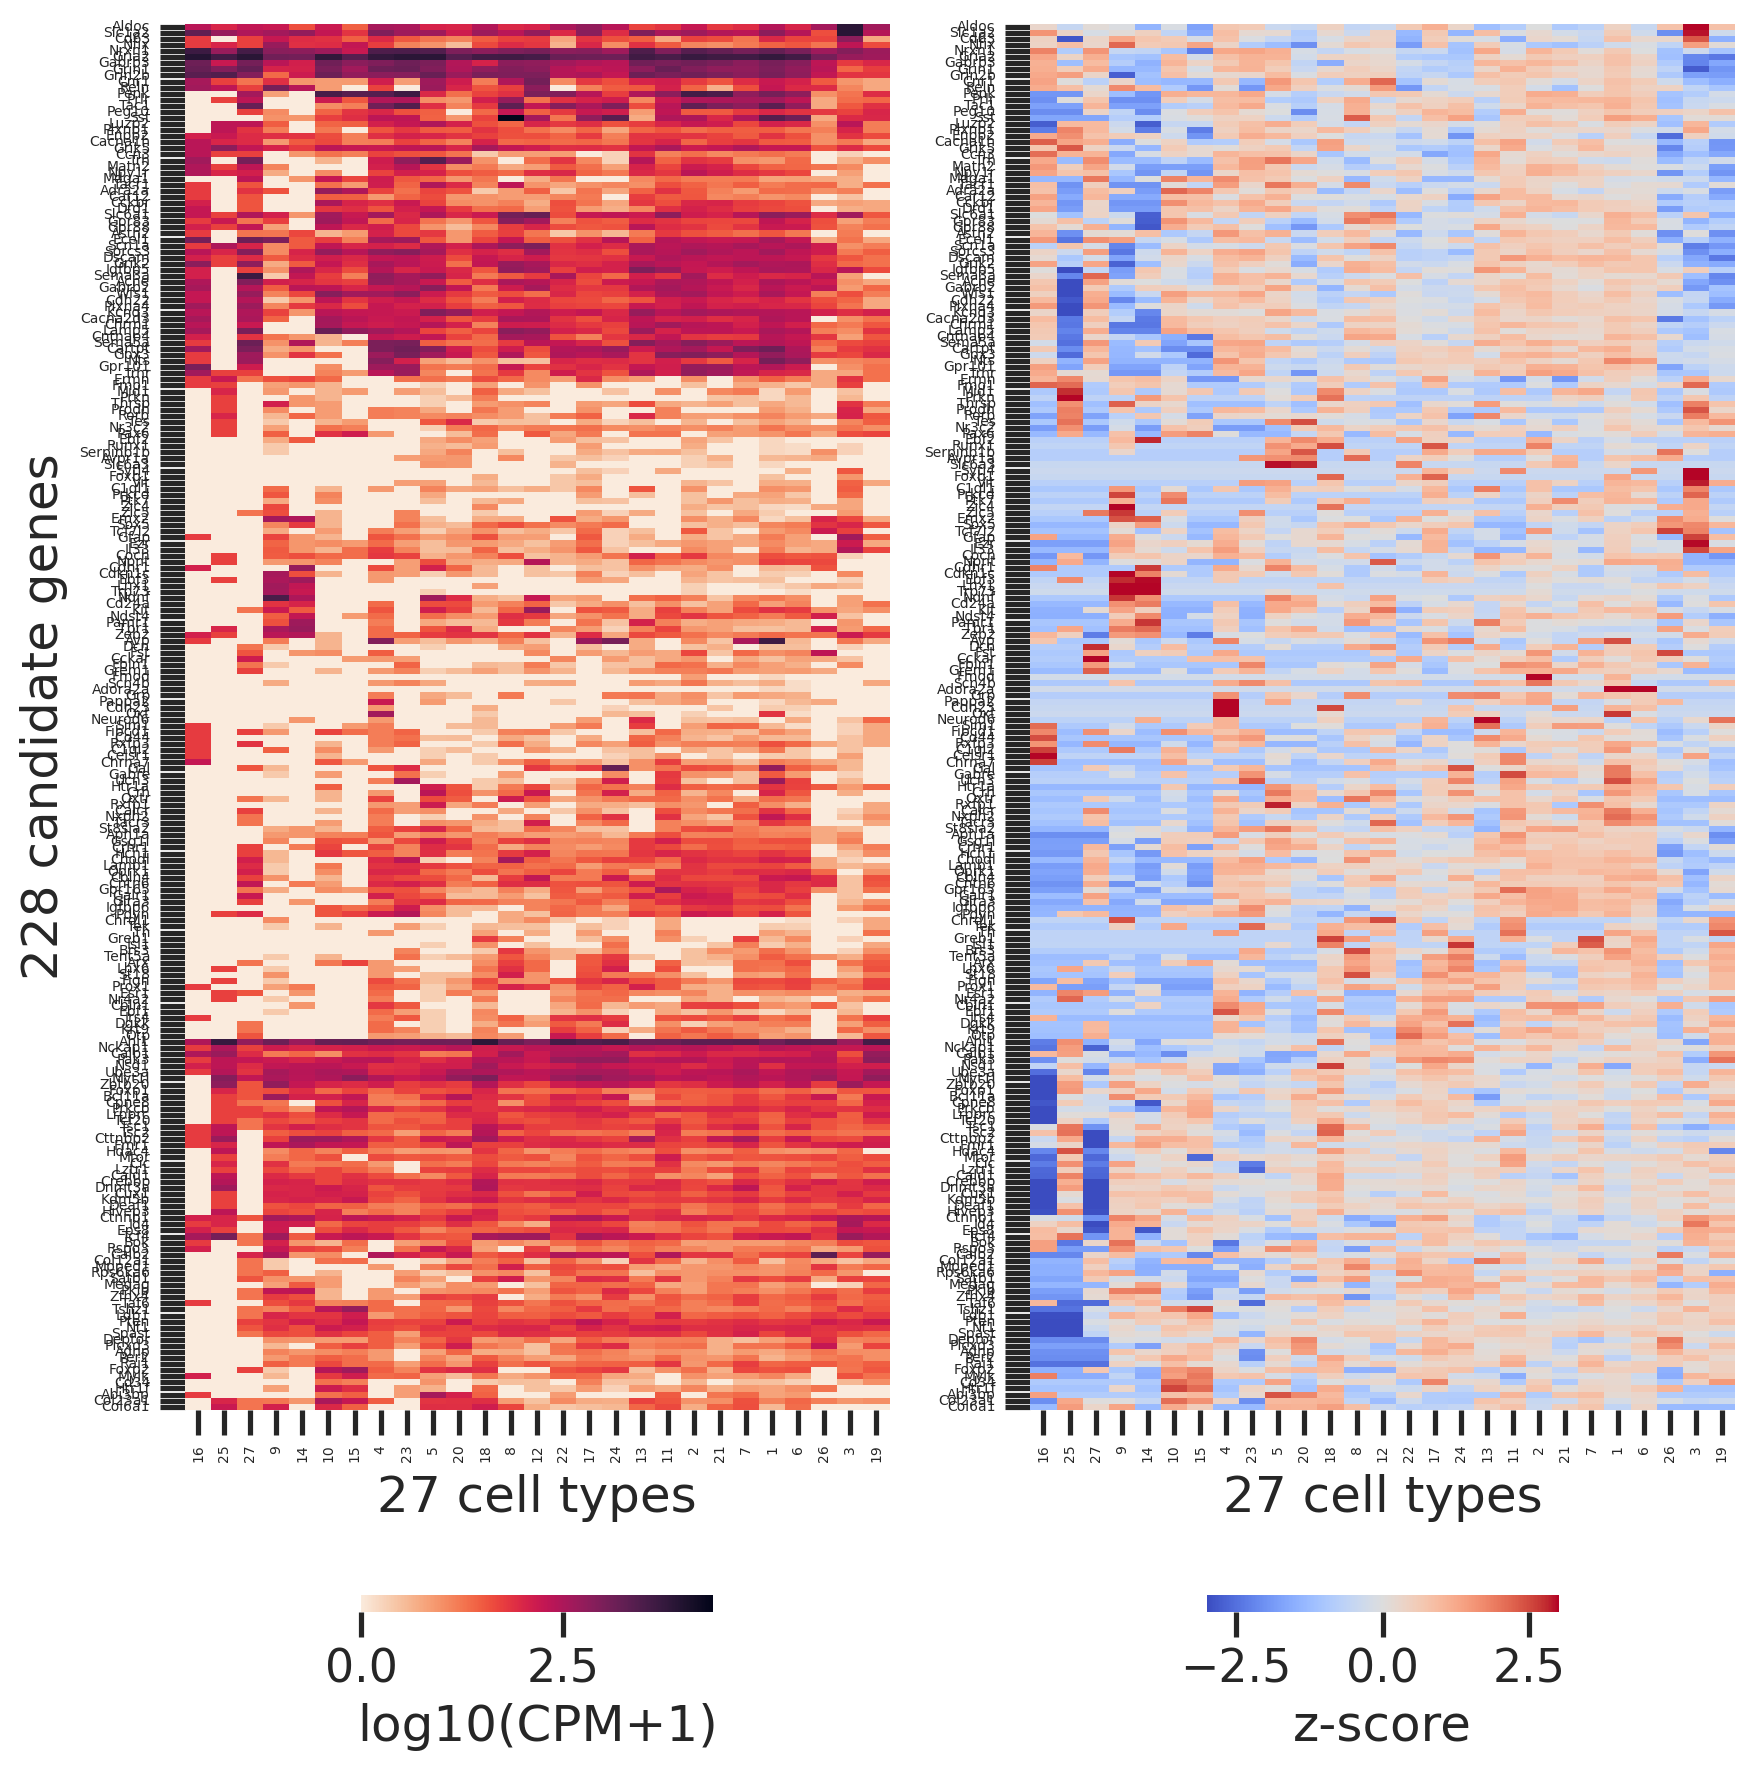

In [49]:
fig, axs = plt.subplots(1,2,figsize=(10,12))
ax = axs[0]
sns.heatmap(
    nsub.iloc[clsts_order,genes_order].T,
    xticklabels=True,
    yticklabels=True,
    cmap='rocket_r',
    cbar_kws=dict(shrink=0.5, orientation='horizontal', pad=0.1, label='log10(CPM+1)',),
    ax=ax,
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
ax.set_ylabel(f"{zsub.shape[1]} candidate genes")
ax.set_xlabel(f"{zsub.shape[0]} cell types")

ax = axs[1]
sns.heatmap(
    zsub.iloc[clsts_order,genes_order].T,
    xticklabels=True,
    yticklabels=True,
    cmap='coolwarm',
    vmin=-3,
    center=0,
    vmax=3, 
    cbar_kws=dict(shrink=0.5, orientation='horizontal', pad=0.1, label='z-score',),
    ax=ax,
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
ax.set_xlabel(f"{zsub.shape[0]} cell types")

plt.show()

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='len'>

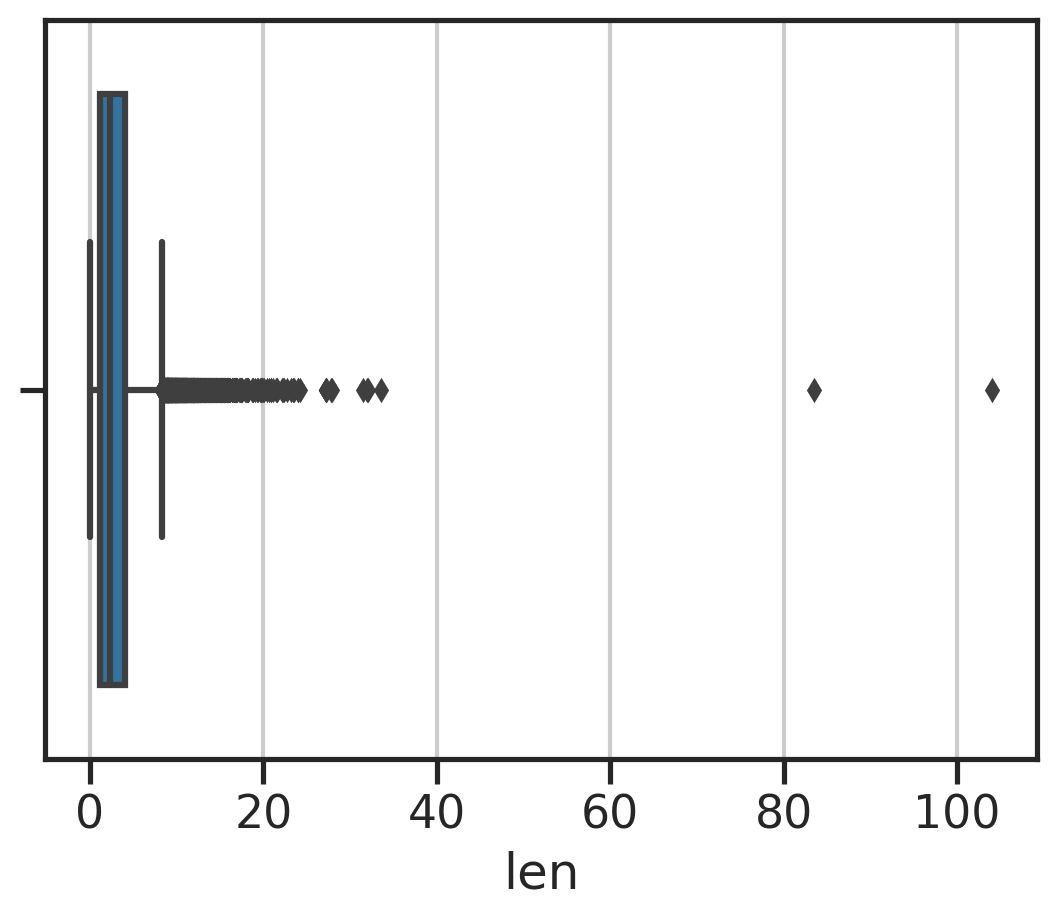

In [27]:
sns.boxplot(exon_lens/1000)

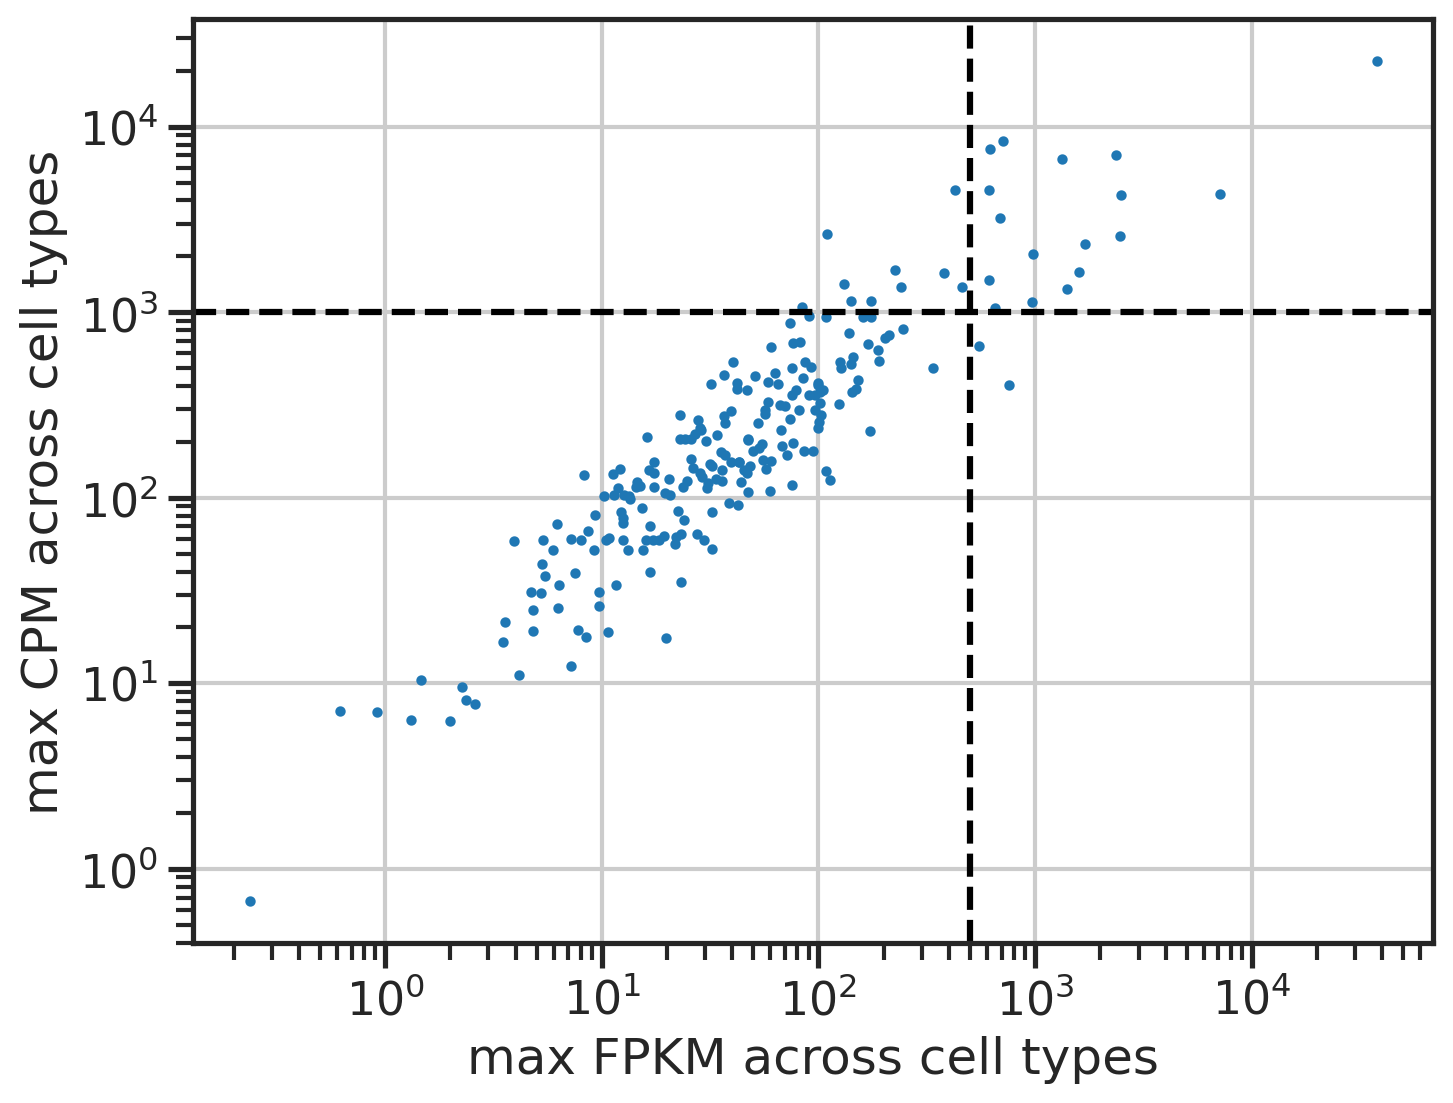

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(maxfpkm, maxcpm, s=5)
ax.set_xlabel('max FPKM across cell types')
ax.set_ylabel('max CPM across cell types')
ax.axvline(500,  color='k', linestyle='--', zorder=1)
ax.axhline(1000, color='k', linestyle='--', zorder=1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Text(0.5, 0, 'log10(CPM+1) (max. across all cell types)')

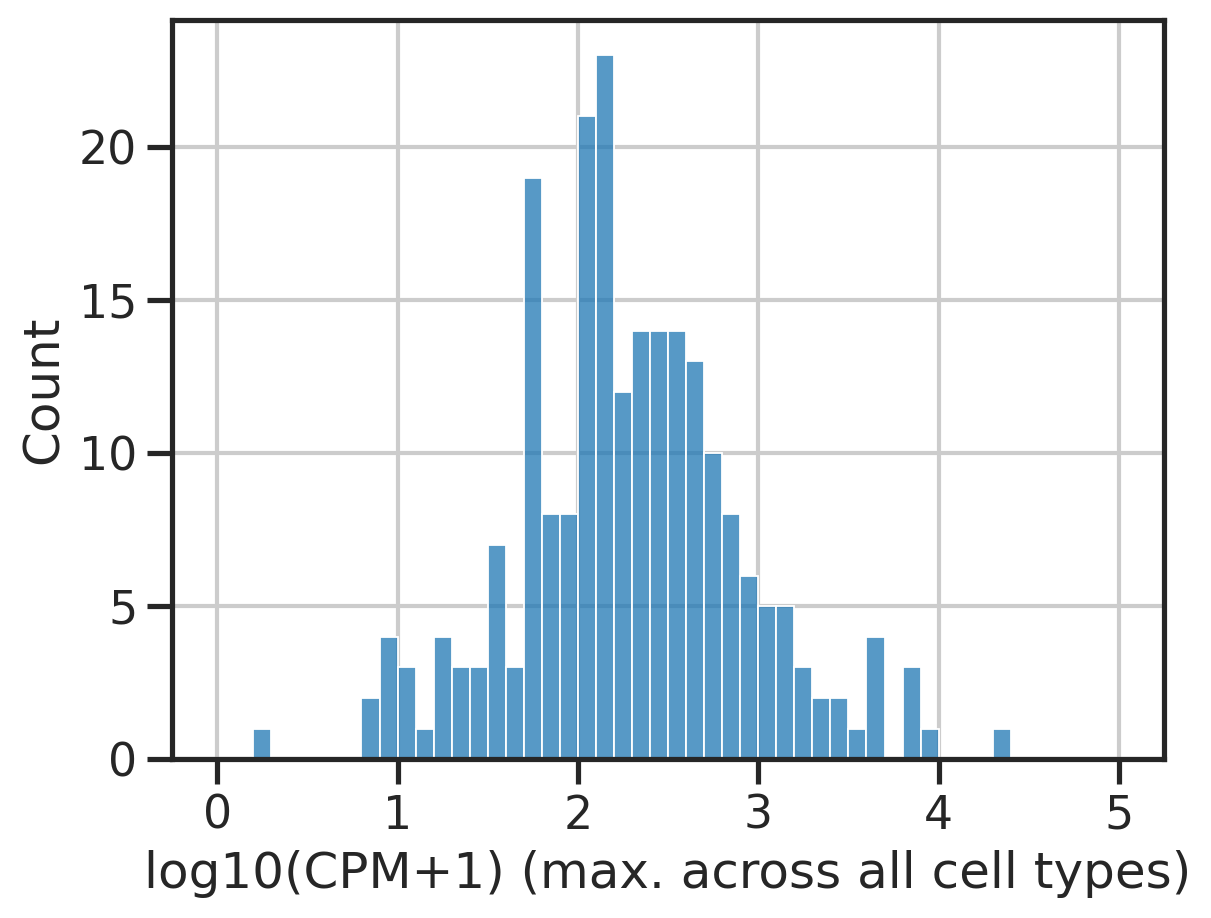

In [42]:
fig, ax = plt.subplots()
sns.histplot(maxlogcpm, bins=np.linspace(0, 5, 51), ax=ax)
ax.set_xlabel('log10(CPM+1) (max. across all cell types)')

Text(0.5, 0, 'Num probes')

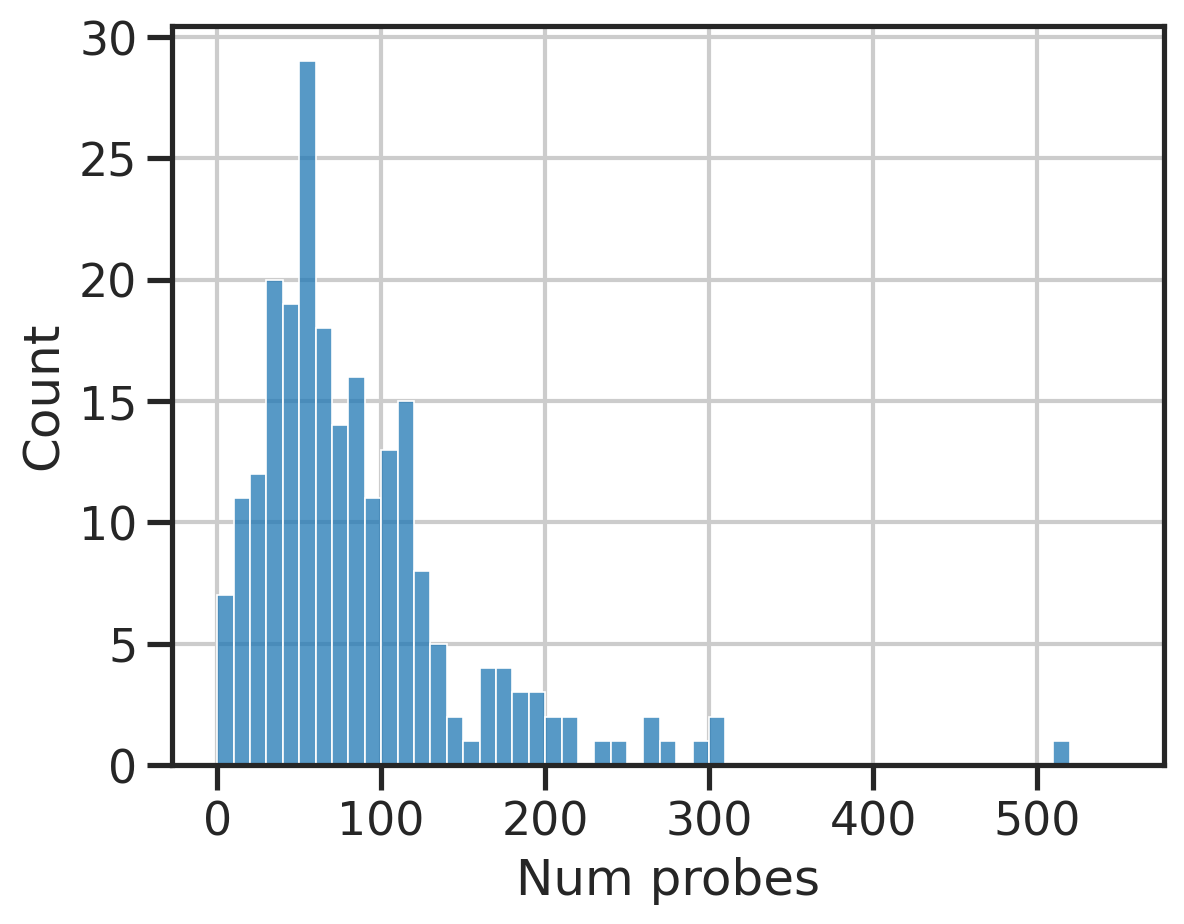

In [40]:
# combine info
fig, ax = plt.subplots()
sns.histplot(num_probes_sub, bins=np.linspace(0, 550, 50+5+1), ax=ax)
ax.set_xlabel('Num probes')

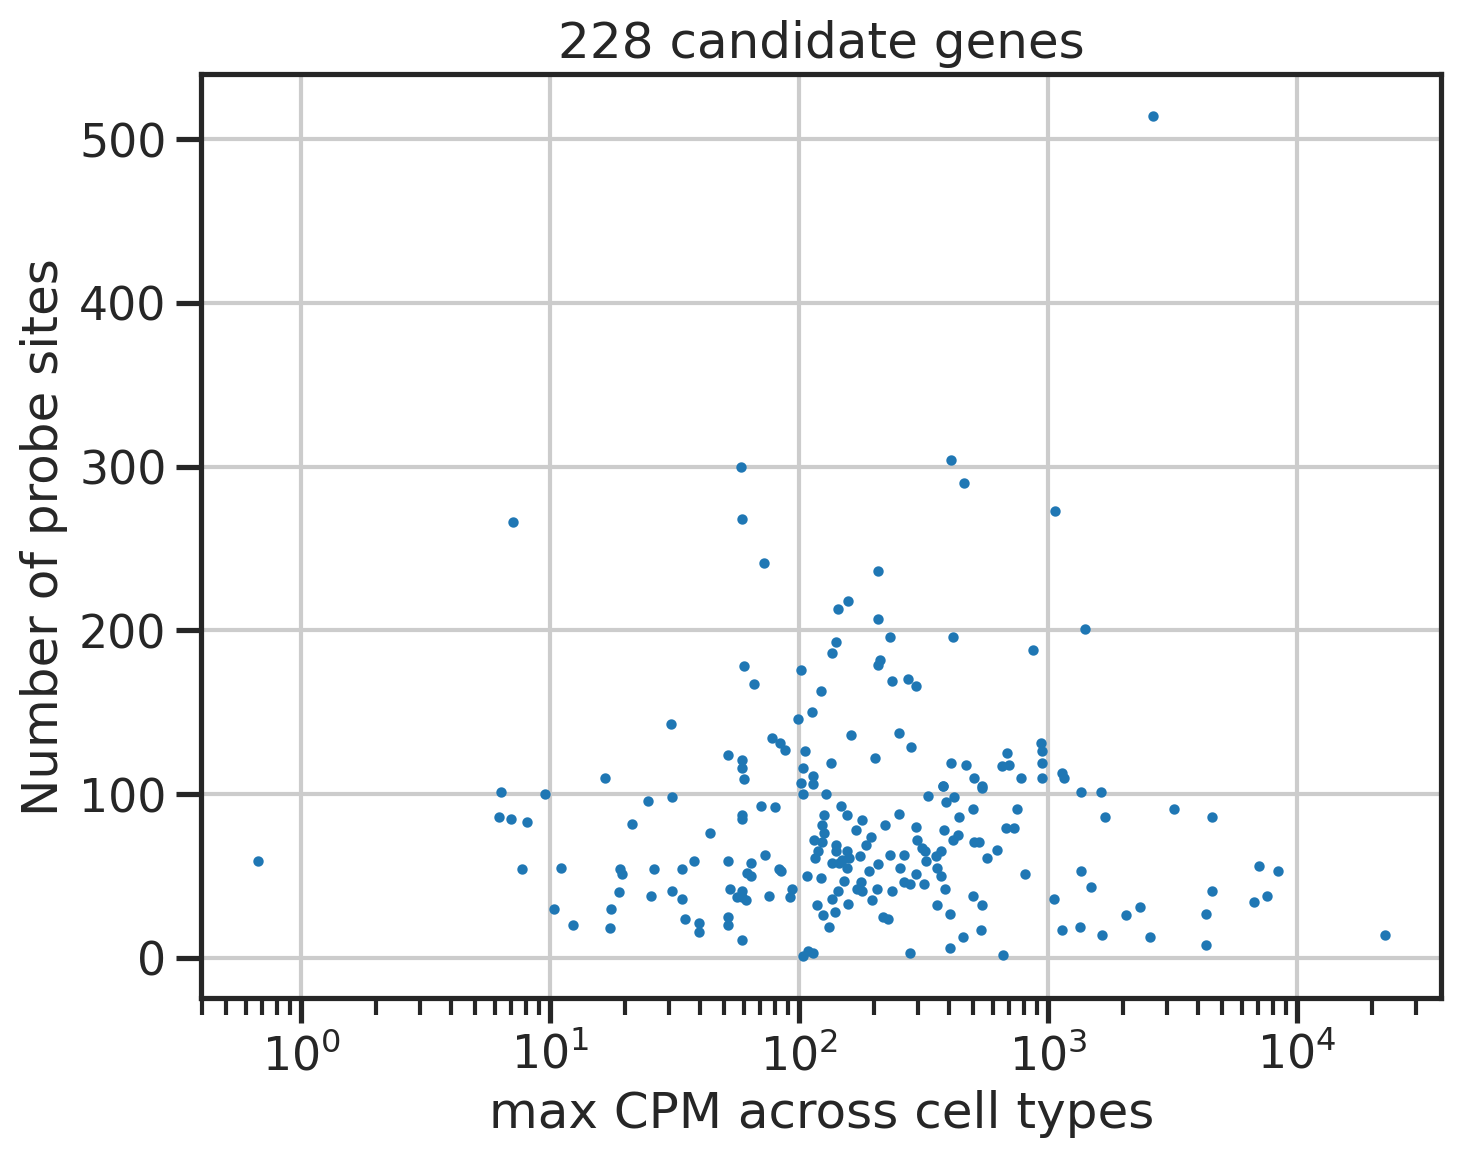

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(maxcpm, num_probes_sub, s=5)
ax.set_xlabel('max CPM across cell types')
ax.set_ylabel('Number of probe sites')

ax.set_xscale('log')
ax.set_title(f"{len(maxcpm)} candidate genes")
plt.show()

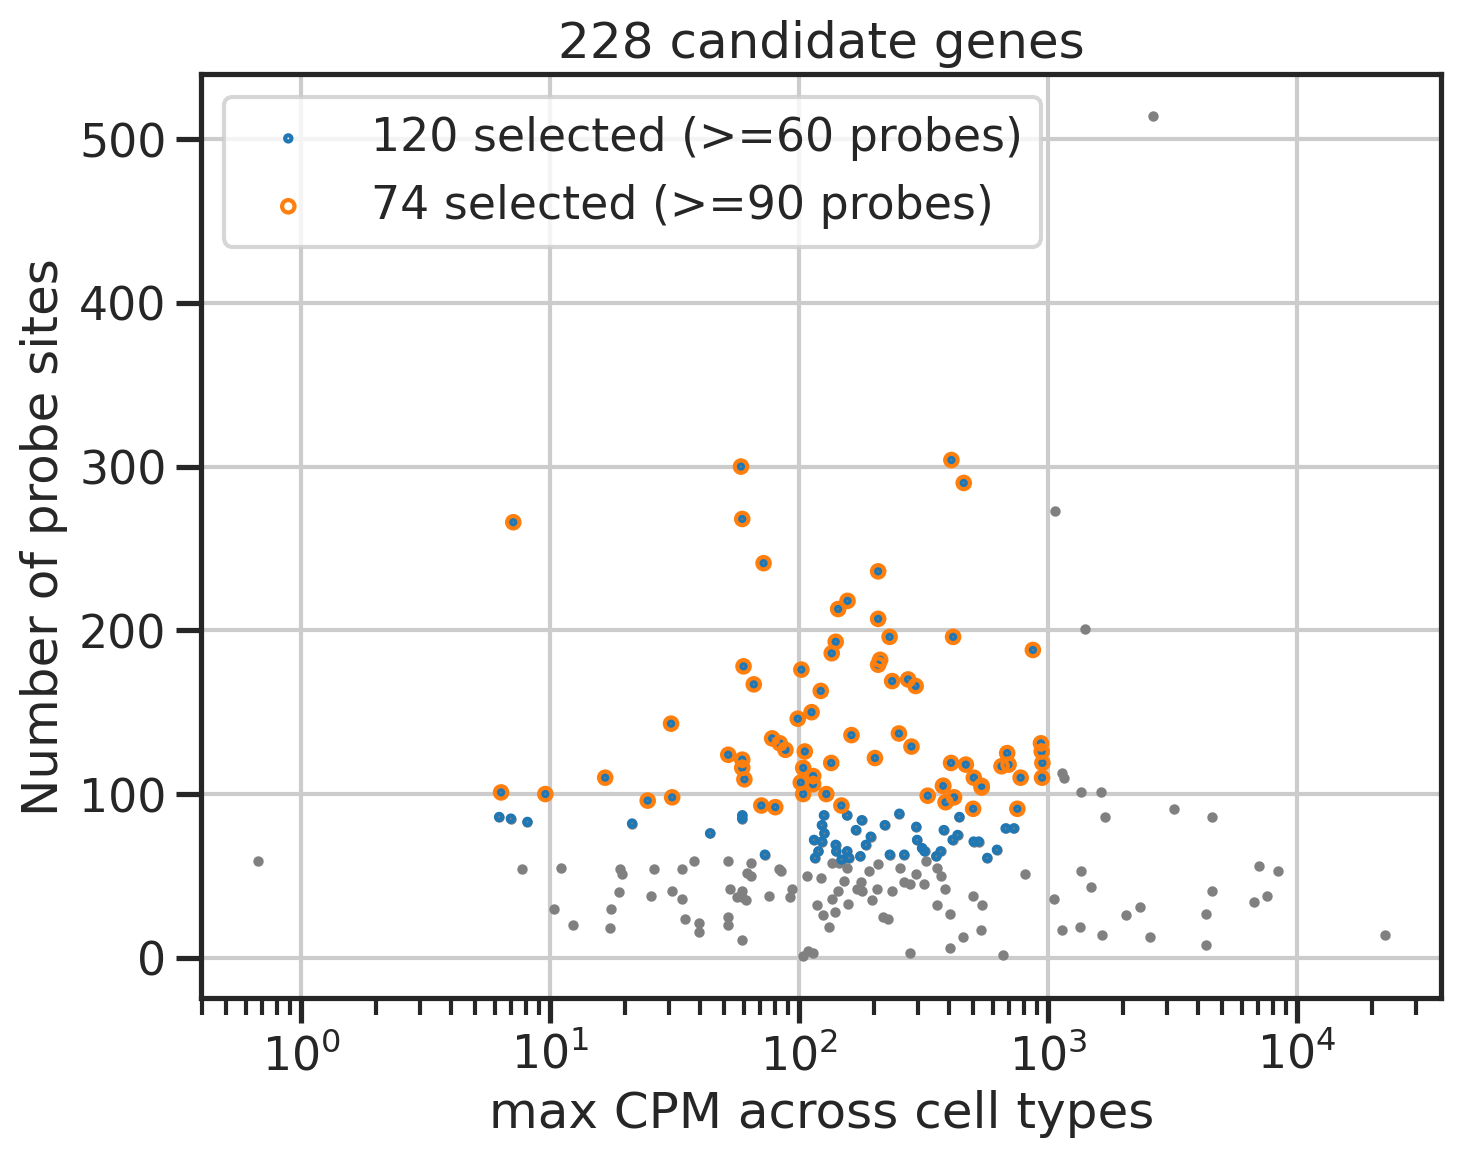

In [79]:
sel_cond1 = np.logical_and(maxcpm<=1000, num_probes_sub>=60)
sel_cond2 = np.logical_and(maxcpm<=1000, num_probes_sub>=90)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(maxcpm, num_probes_sub, s=5, color='gray')

ax.scatter(maxcpm[sel_cond1], num_probes_sub[sel_cond1], s=5, 
           label=f"{sel_cond1.sum()} selected (>=60 probes)", facecolors='none', edgecolors='C0')

ax.scatter(maxcpm[sel_cond2], num_probes_sub[sel_cond2], s=20, 
           label=f"{sel_cond2.sum()} selected (>=90 probes)", facecolors='none', edgecolors='C1')

ax.set_xlabel('max CPM across cell types')
ax.set_ylabel('Number of probe sites')
ax.set_title(f"{len(maxcpm)} candidate genes")
ax.set_xscale('log')
ax.legend() #bbox_to_anchor=(1,1))
plt.show()

In [80]:
# google sheet

In [93]:
dfout = df.copy()
dfout = dfout.set_index('Gene_name_std')

# expressed
dfout['expressed'] = False
dfout.loc[genes_comm, 'expressed'] = True

dfout['maxcpm'] = False
dfout.loc[genes_comm, 'maxcpm'] = maxcpm

dfout

,Gene name,Source,priority,priority_binary,num_probes,expressed,maxcpm
Gene_name_std,,,,,,,
Adra2a,Adra2aAdra2a,"Chen 2019, Cell; MeA, neuronal subtype markers...",YesNo,1,71,True,526.811523
Brs3,Brs3,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,58,True,64.05159
Cckar,Cckar,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,65,True,141.188095
Cckbr,Cckbr,"Chen 2019, Cell; MeA, neuronal subtype markers...",Yes,1,65,True,319.279694
Chodl,Chodl,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,50,True,373.266205
...,...,...,...,...,...,...,...
Zbtb20,ZBTB20,"Herrero 2020, Molecular Autism; human ASD risk...",No,0,66,True,623.765442
Zeb2,Zeb2,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0,3,True,278.506287
Zfhx4,Zfhx4,"Hochgeborner 2022, bioRxiv; glutamatergic neur...",No,0,300,True,58.481731


In [94]:
fout = "/bigstore/GeneralStorage/fangming/projects/amygdala/Honglab_Amygdala_genes_organized_Dec8_2022.csv"
dfout.to_csv(fout)

In [95]:
!head $fout

Gene_name_std,Gene name,Source,priority,priority_binary,num_probes,expressed,maxcpm
Adra2a,Adra2aAdra2a,"Chen 2019, Cell; MeA, neuronal subtype markers/neuropeptide receptorsHochgeborner 2022, bioRxiv; GABAergic neuron markers, IA and CeA",YesNo,1,71,True,526.8115234375
Brs3,Brs3,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,58,True,64.05158996582031
Cckar,Cckar,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,65,True,141.18809509277344
Cckbr,Cckbr,"Chen 2019, Cell; MeA, neuronal subtype markers/neuropeptide receptors",Yes,1,65,True,319.2796936035156
Chodl,Chodl,"Chen 2019, Cell; MeA, sexually dimorphic genes",Yes,1,50,True,373.2662048339844
Chrm1,Chrm1,"Chen 2019, Cell; MeA, neuronal subtype markers/neuropeptide receptors",Yes,1,119,True,408.1578674316406
Crhr1,Crhr1,"Chen 2019, Cell; MeA, neuronal subtype markers/neuropeptide receptors",Yes,1,54,True,83.50236511230469
Dgkk,DgkkDgkk,"Chen 2019, Cell; MeA, sexually dimorphic genesHochgeborner 2022, bioRxiv; glutamatergic